c:\Users\sukha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sukha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sukha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.3681 - loss: 1.7023 - val_accuracy: 0.4963 - val_loss: 1.3837
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5189 - loss: 1.3461 - val_accuracy: 0.5826 - val_loss: 1.1766
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5828 - loss: 1.1810 - val_accuracy: 0.6288 - val_loss: 1.0459
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6235 - loss: 1.0809 - val_accuracy: 0.6506 - val_loss: 0.9995
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6540 - loss: 0.9936 - val_accuracy: 0.6674 - val_loss: 0.9459
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6754 - loss: 0.9297 - val_accuracy: 0.6926 - val_loss: 0.8794
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6927 - loss: 0.8783 - val_accuracy: 0.7040 - val_loss: 0.8597
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7090 - loss: 0.8349 - 

✅ Test Accuracy: 71.18%
💾 Model saved as crop_disease_model.h5


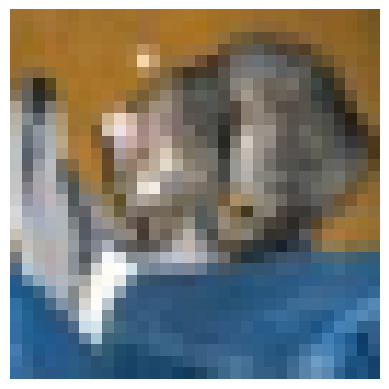

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
🔍 Predicted Disease: Tomato___Leaf_Mold
✅ Confidence: 64.19%


In [1]:
# ============================================================
# 🌱 Crop Disease Detection (Demo with CIFAR-10 dataset)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# -----------------------------
# 1. Load Dataset (CIFAR-10)
# -----------------------------
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Fake Crop Disease Labels mapped from CIFAR-10
class_names = [
    "Tomato___Bacterial_spot",       # airplane
    "Tomato___Early_blight",         # automobile
    "Tomato___Late_blight",          # bird
    "Tomato___Leaf_Mold",            # cat
    "Tomato___Septoria_leaf_spot",   # deer
    "Tomato___Spider_mites",         # dog
    "Tomato___Target_Spot",          # frog
    "Tomato___YellowLeaf_Curl_Virus",# horse
    "Tomato___Mosaic_virus",         # ship
    "Tomato___Healthy"               # truck
]

# -----------------------------
# 2. Build CNN Model
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 3. Train Model
# -----------------------------
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=64)

# -----------------------------
# 4. Evaluate Model
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

# -----------------------------
# 5. Save Model
# -----------------------------
model.save("crop_disease_model.h5")
print("💾 Model saved as crop_disease_model.h5")

# -----------------------------
# 6. Prediction Example
# -----------------------------
def predict_image(index):
    img = x_test[index]
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"🔍 Predicted Disease: {class_names[class_index]}")
    print(f"✅ Confidence: {confidence*100:.2f}%")

# Try prediction
predict_image(0)


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),   # <--- This ensures we get 512 features
    Dense(10, activation="softmax")
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
